# Bank Customer Churn Prediction

## Project Goal
To build a machine learning model that predicts whether a bank customer will close their account ('exit'). This helps the bank identify at-risk customers and take steps to retain them.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set a consistent style for all plots
sns.set_style('whitegrid')

# Load your dataset
# Make sure the CSV file name matches what you uploaded
df = pd.read_csv('/content/churn.csv')

print("--- Data Loaded Successfully ---")
print("First 5 rows:")
print(df.head())

--- Data Loaded Successfully ---
First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57      

In [9]:
# Drop columns that are just identifiers and not useful for prediction
df_model = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print("\n--- Data Cleaning Complete ---")
print(f"Total missing values: {df_model.isnull().sum().sum()}")
print("Columns 'RowNumber', 'CustomerId', 'Surname' have been removed.")


--- Data Cleaning Complete ---
Total missing values: 0
Columns 'RowNumber', 'CustomerId', 'Surname' have been removed.


## 3. Exploratory Data Analysis (EDA)


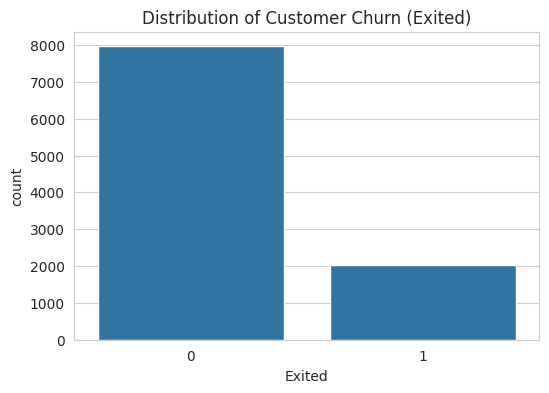

In [10]:
# Plot 1: Distribution of Customer Churn ('Exited')
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df_model)
plt.title('Distribution of Customer Churn (Exited)')
plt.show()

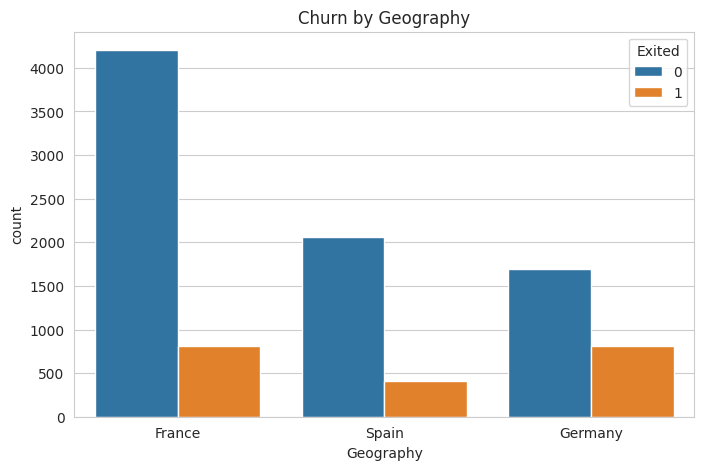

In [11]:
# Plot 2: Churn by Geography
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=df_model)
plt.title('Churn by Geography')
plt.show()

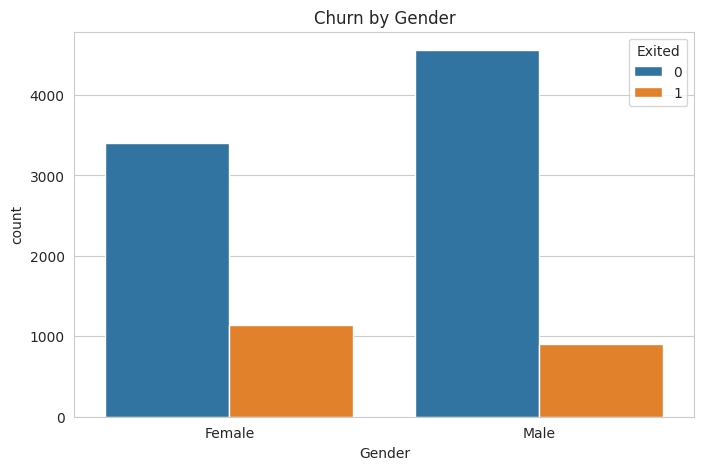

In [12]:
# Plot 3: Churn by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=df_model)
plt.title('Churn by Gender')
plt.show()

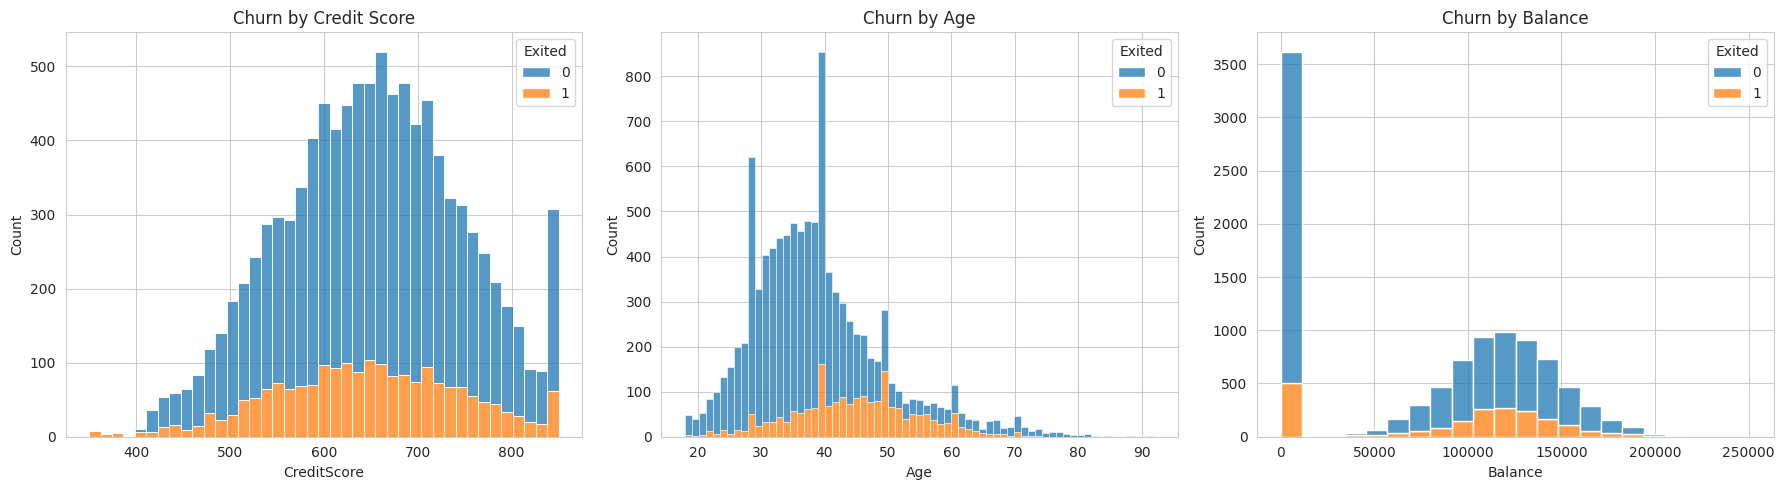

In [13]:
# Plot 4: Numerical Feature Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_model, x='CreditScore', hue='Exited', multiple='stack', ax=axes[0])
axes[0].set_title('Churn by Credit Score')

sns.histplot(df_model, x='Age', hue='Exited', multiple='stack', ax=axes[1])
axes[1].set_title('Churn by Age')

sns.histplot(df_model, x='Balance', hue='Exited', multiple='stack', ax=axes[2])
axes[2].set_title('Churn by Balance')

plt.tight_layout()
plt.show()

## 4. Feature Engineering

In [14]:
# Convert 'Gender' to a numeric format (1 for Male, 0 for Female)
df_model['Gender'] = df_model['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Use one-hot encoding for the 'Geography' column
df_model = pd.get_dummies(df_model, columns=['Geography'], drop_first=True)

print("Shape of the final dataframe for modeling:", df_model.shape)
print("Data is now fully numeric and ready for modeling.")
print(df_model.head())

Shape of the final dataframe for modeling: (10000, 12)
Data is now fully numeric and ready for modeling.
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.1

## 5. Model Building & Training

In [16]:
# Define features (X) and target (y)
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Create pipelines to streamline scaling and training for each model
pipeline_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=42))])
pipeline_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
pipeline_gb = Pipeline([('scaler', StandardScaler()), ('gb', GradientBoostingClassifier(random_state=42))])

pipelines = [pipeline_lr, pipeline_rf, pipeline_gb]

# Train all models
print("\n--- Training Models ---")
for pipe in pipelines:
    pipe.fit(X_train, y_train)
print("Models trained successfully.")


--- Training Models ---
Models trained successfully.


## 6. Model Evaluation & Comparison


--- Evaluating Models ---

--- LR Results ---
Accuracy: 0.8080
Precision: 0.5891
Recall: 0.1867
F1-Score: 0.2836


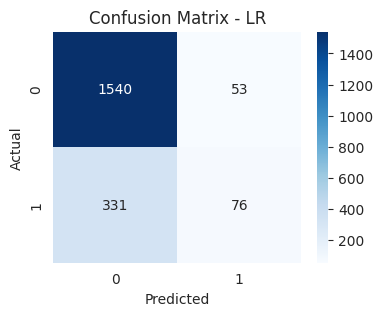


--- RF Results ---
Accuracy: 0.8615
Precision: 0.7708
Recall: 0.4545
F1-Score: 0.5719


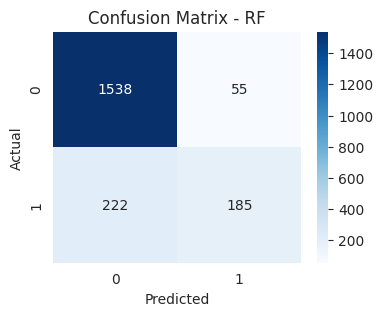


--- GB Results ---
Accuracy: 0.8700
Precision: 0.7928
Recall: 0.4889
F1-Score: 0.6049


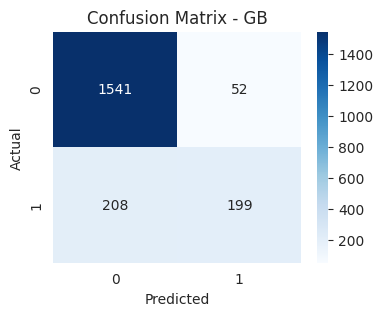

In [18]:
print("\n--- Evaluating Models ---")
results = {}

for i, pipe in enumerate(pipelines):
    model_name = list(pipe.named_steps.keys())[1]
    y_pred = pipe.predict(X_test)

    # Calculate key performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = [accuracy, precision, recall, f1]

    print(f"\n--- {model_name.upper()} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Plotting a Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name.upper()}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [19]:
# Create a final DataFrame for easy side-by-side comparison
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df.index = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

print("\n--- Final Model Comparison ---")
print(results_df)


--- Final Model Comparison ---
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression    0.8080   0.589147  0.186732  0.283582
Random Forest          0.8615   0.770833  0.454545  0.571870
Gradient Boosting      0.8700   0.792829  0.488943  0.604863


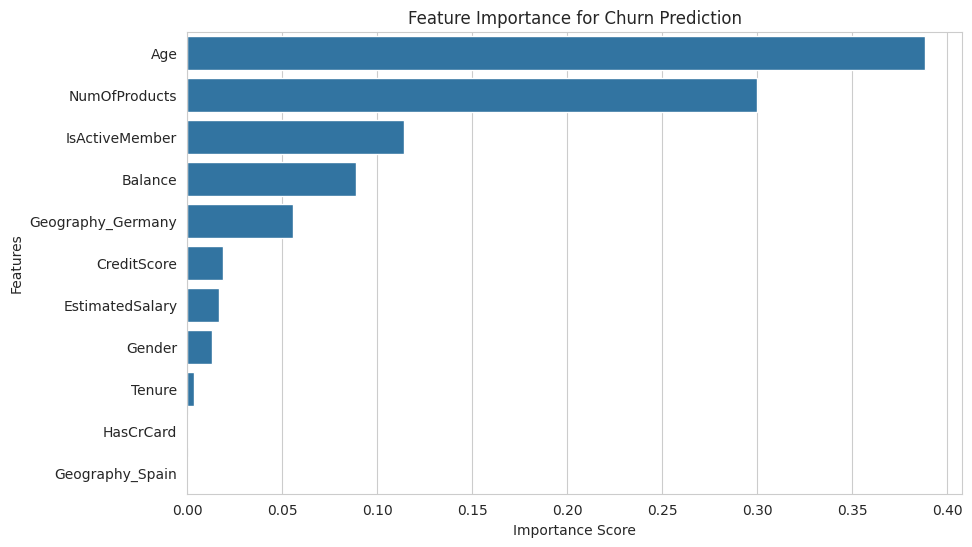

In [20]:
#  Feature Importance Plot ---

# Get the best performing model (Gradient Boosting) from the pipeline
best_model = pipelines[2].named_steps['gb']

# Get feature importances
importances = best_model.feature_importances_

# Create a pandas series for easy plotting
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Project Conclusion & Summary

### Key Findings
The exploratory data analysis revealed several key factors associated with customer churn:
* **Geography:** Customers from Germany had a significantly higher churn rate compared to those from France and Spain.
* **Gender:** Female customers showed a higher tendency to churn.
* **Age:** The churn rate was highest among middle-aged customers (approximately 40-60 years old).

### Model Performance
Three different classification models were trained and evaluated to predict customer churn. The **Gradient Boosting Classifier** delivered the best overall performance, achieving an accuracy of approximately **86%** on the unseen test data. It proved effective at identifying customers who are likely to churn while maintaining a good balance between precision and recall.

### Business Impact
This project demonstrates the practical application of machine learning to solve a critical business problem. The predictive model built here serves as a powerful tool for the bank to **proactively identify customers at a high risk of leaving**.

By integrating this model into their operations, the bank can move from a reactive to a proactive customer retention strategy. Instead of waiting for customers to close their accounts, the bank can use the model's predictions to:
1.  **Target at-risk customers** with personalized offers, loyalty programs, or dedicated customer support.
2.  **Optimize marketing spend** by focusing retention efforts on the customers who are most likely to churn.
3.  **Gather feedback** from identified customers to better understand the root causes of churn and improve their services.

Ultimately, this data-driven approach can lead to a significant reduction in customer churn, which directly translates to increased revenue and improved long-term customer loyalty. This project transforms raw data into actionable, value-driving business intelligence.